In [1]:
!pip install psycopg2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.8/383.8 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      running egg_info
      creating /tmp/pip-pip-egg-info-hg3ip_l4/psycopg2.egg-info
      writing /tmp/pip-pip-egg-info-hg3ip_l4/psycopg2.egg-info/PKG-INFO
      writing dependency_links to /tmp/pip-pip-egg-info-hg3ip_l4/psycopg2.egg-info/dependency_links.txt
      writing top-level names to /tmp/pip-pip-egg-info-hg3ip_l4/psycopg2.egg-info/top_level.txt
      writing manifest file '/tmp/pip-pip-egg-info-hg3ip_l4/psycopg2.egg-info/SOURCES.txt'
      
      Error: pg_config executable not found.
      
      pg_config is required to build psycopg2 from source.  Please add the directory
      containing pg_config to the $PATH or specify the full executable path with the
      option:
      
          python setup.py bu

In [2]:
!pip install pandas numpy matplotlib seaborn psycopg2-binary

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/de/ce/b5d9c7ce1aaf9023b823c81932a50cd5e8f407198a696b0d1c6025a40b03/pandas-2.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/c4/36/161e2f8110f8c49e59f6107bd6da4257d30aff9f06373d0471811f73dcc5/numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 838.9 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/65/5b/3b8fd7d66043f0638a35fa650570cbe69efd42fe169e5024f9307598b47e/matplotlib-3.8.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import psycopg2
import os

conn = psycopg2.connect(
    host="database_container1000",
    database=os.environ.get('POSTGRES_DB'),
    user=os.environ.get('POSTGRES_USER'),
    password=os.environ.get('POSTGRES_PASSWORD')
)

cursor = conn.cursor()
cursor.execute("SELECT * FROM new_offers")
rows = cursor.fetchall()
for row in rows:
    print(row)

query = "SELECT * FROM new_offers"
df = pd.read_sql_query(query, conn)

(1, 'https://nofluffjobs.com/job/senior-python-backend-developer-shuter-smith-international-thehague', 'Senior Python Backend Developer', 'Shuter Smith International', 'Hybrid', '<None>', '24\xa0965  – 28\xa0806', 'gross per month (employment)', 'Your key technical skills should include Python, with MongoDB, Redis, Asyncio\xa0and 5-8 years solid back-end development experience within a microservices environment., We would like you to have good coaching and communication skills and the seniority to provide mentoring and guidance to team colleagues and other stakeholders., You should be fully fluent in English.', 'Are you a committed software development professional, who is eager to work independently and proactively to reach the highest technical & business goals? If so, an excellent opportunity now exists on new project developments offering significant technical scope and challenge., You can expect a lot of freedom (which comes with responsibility) and opportunities to grow significa

/tmp/ipykernel_683/1972631188.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [4]:
df.head()

,id,offer_link,offer_name,company,main_location,other_location,salary,salary_type,main_requirements_description,main_offer_description,...,benefits,company_info_founded_in,company_info_company_size,company_info_main_location,date_of_scrapping,when_published_relatively,categories,skills_maturity,tags_mandatory,tags_nice_to_have
0,1,https://nofluffjobs.com/job/senior-python-back...,Senior Python Backend Developer,Shuter Smith International,Hybrid,<None>,24 965 – 28 806,gross per month (employment),Your key technical skills should include Pytho...,Are you a committed software development profe...,...,<None>,<None>,<None>,<None>,2023-10-03,today,"Backend, Python",Senior,"Python, MongoDB, Redis, Microservices",<None>
1,2,https://nofluffjobs.com/job/python-devops-deve...,Python DevOps Developer,Sigma IT Poland,"Wrocław, Warszawa, Kraków",Remote,17 600 – 25 600,+ VAT (B2B) per month,You might be the perfect match if you are/have...,Offer description,...,"Sport subscription, Training budget, Private h...",<None>,<None>,<None>,2023-10-03,today,<None>,Senior,"Python, Git, AWS, API, CloudFormation, CloudWa...","pandas, Jenkins"
2,3,https://nofluffjobs.com/job/back-end-python-en...,Back-end Python Engineer (Senior),Tooploox,"Warsaw, Poland, Wrocław",Remote,19 000 – 24 000,+ VAT (B2B) per month,"Experience and skills you need to join us:, Fu...",We are Tooploox and we work on projects that i...,...,"Sport subscription, Training budget, Private h...",2012,120,<None>,2023-10-03,1 day ago,"Backend, Python",Senior,"Python, Microservices, CI/CD, AWS, GCP, Kubern...","GraphQL, Message queue"
3,4,https://nofluffjobs.com/job/senior-python-deve...,Senior Python Developer,Graylight Imaging Sp. zo.o.,"Gliwice, Bojkowska 37a",Remote,11 400 – 18 500,gross per month (employment),"Original text., Show translation, Czego od Cie...","Original text., Show translation, W, Graylight...",...,"Training budget, Private healthcare, Flat stru...",<None>,<None>,<None>,2023-10-03,This offer expires in 3 days,"Backend, Python",Senior,"Python, MongoDB, Docker, Nginx, CI/CD","Gunicorn, Connexion, Swagger, SciPy, Pyvista, ..."
4,5,https://nofluffjobs.com/job/senior-python-deve...,Senior Python Developer,Avenga,<None>,Remote,26 040 – 27 720,+ VAT (B2B) per month,<None>,We are looking for a well organized and enthus...,...,"Sport subscription, Training budget, Private h...",2004,+2500,<None>,2023-10-03,This offer expires in 3 days,"Backend, Python",Senior,"Python, Celery, pytest, Docker, CI Pipelines, ...",<None>


In [5]:
import matplotlib.pyplot as plt

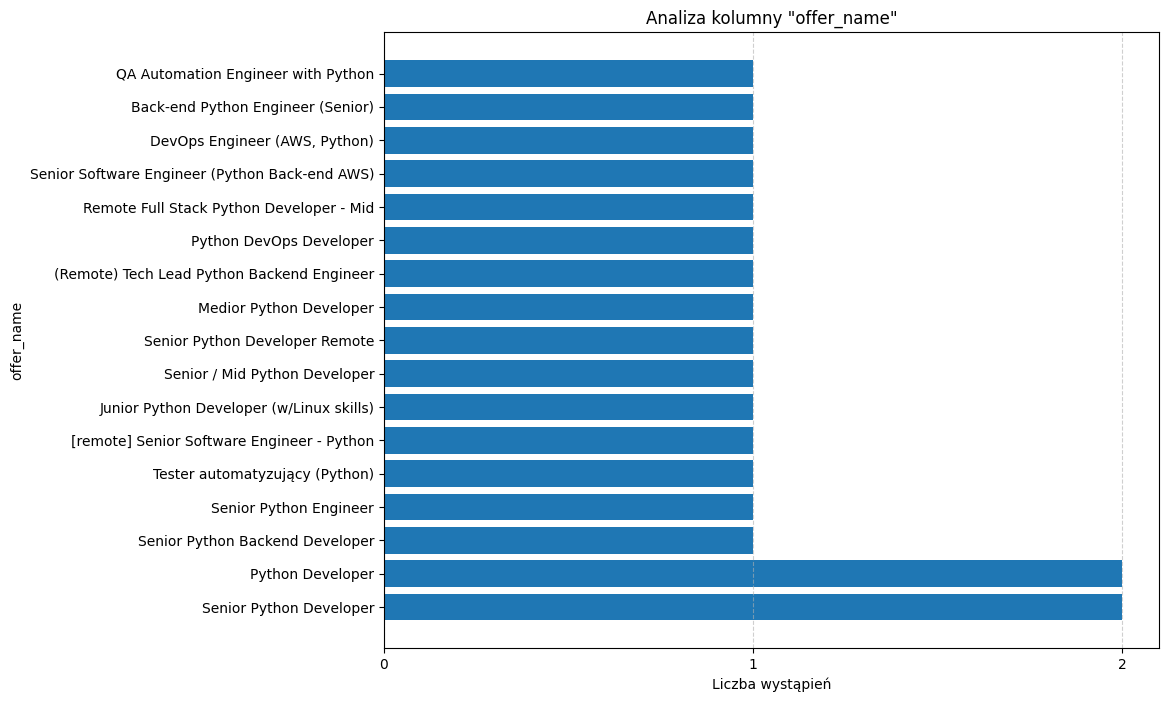

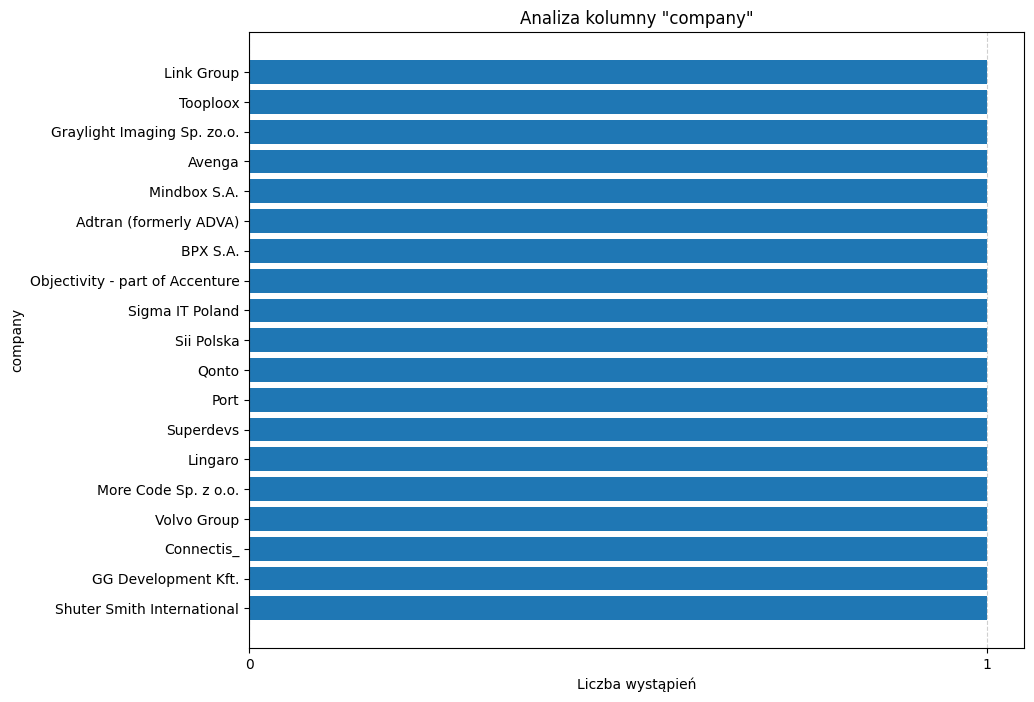

In [6]:
from matplotlib.ticker import MaxNLocator

def analyze_column(dataframe, column_name):
    # Sprawdź, czy kolumna istnieje w ramce danych
    if column_name not in dataframe.columns:
        print(f'Kolumna "{column_name}" nie istnieje w ramce danych.')
        return

    # Zliczanie wystąpień unikatowych wartości
    value_counts = dataframe[column_name].value_counts()
    
   # Tworzenie wizualizacji
    plt.figure(figsize=(10, 8))  # Ustawienie rozmiaru wykresu
    ax = plt.gca()  # Pobranie obecnej osi (get current axis)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Ustawienie lokalizatora głównych znaczników osi X, aby używał tylko liczb całkowitych
    plt.barh(value_counts.index, value_counts.values)  # Użycie barh dla poziomego wykresu słupkowego
    plt.ylabel(column_name)
    plt.xlabel('Liczba wystąpień')
    plt.title(f'Analiza kolumny "{column_name}"')
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Zmiana osi siatki na 'x'
    plt.show()


# Wywołanie funkcji
analyze_column(df, 'offer_name')

analyze_column(df, 'company')


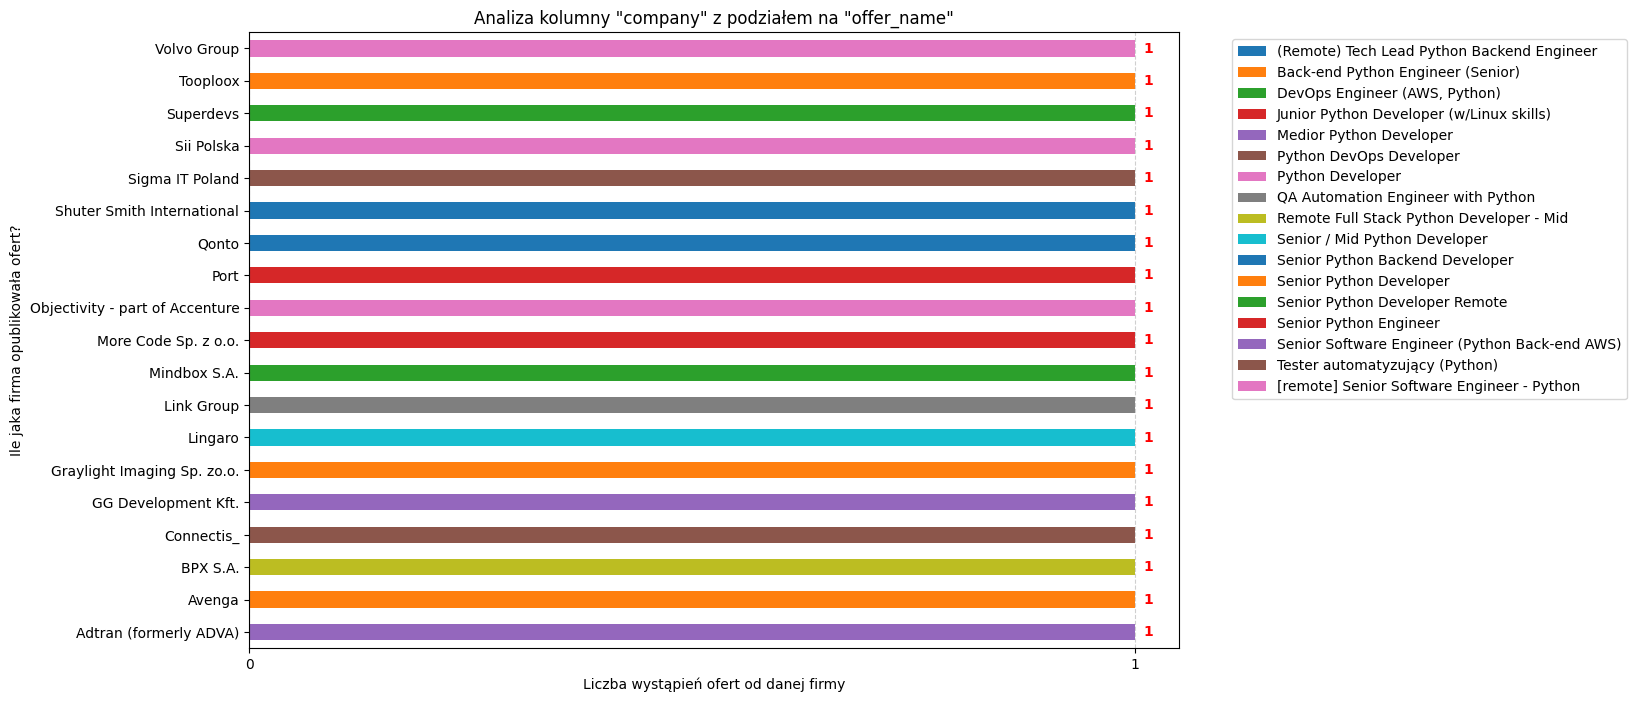

In [7]:
from matplotlib.ticker import MaxNLocator

def analyze_column_company_with_offer_names(dataframe, column_name="company", offer_column_name="offer_name"):
    # Sprawdź, czy kolumna istnieje w ramce danych
    if column_name not in dataframe.columns:
        print(f'Kolumna "{column_name}" nie istnieje w ramce danych.')
        return

    # Sprawdź, czy kolumna z nazwami ofert istnieje w ramce danych
    if offer_column_name not in dataframe.columns:
        print(f'Kolumna "{offer_column_name}" nie istnieje w ramce danych.')
        return

    # Grupowanie danych według kolumny i kolumny z nazwami ofert, a następnie zliczanie wielkości każdej grupy
    grouped_data = dataframe.groupby([column_name, offer_column_name]).size().unstack(fill_value=0)

    # Obliczenie łącznej liczby ofert dla każdej firmy
    total_offers = grouped_data.sum(axis=1)

    # Tworzenie wizualizacji
    plt.figure(figsize=(12, 8))  # Ustawienie rozmiaru wykresu
    ax = plt.gca()  # Pobranie obecnej osi (get current axis)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Ustawienie lokalizatora głównych znaczników osi X, aby używał tylko liczb całkowitych

    # Rysowanie poziomego wykresu słupkowego z podgrupami
    grouped_data.plot(kind='barh', stacked=True, ax=ax)
    
    # Dodanie łącznej liczby ofert jako tekst na wykresie
    for i, total in enumerate(total_offers):
        plt.text(total + grouped_data.max().max() * 0.01, i, str(total), va='center', color='red', fontweight='bold', fontsize=10)
    
    plt.ylabel('Ile jaka firma opublikowała ofert?')
    plt.xlabel('Liczba wystąpień ofert od danej firmy')
    plt.title(f'Analiza kolumny "{column_name}" z podziałem na "{offer_column_name}"')
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Zmiana osi siatki na 'x'

    # Przeniesienie legendy poza obszar wykresu
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()


analyze_column_company_with_offer_names(df, 'company', 'offer_name')


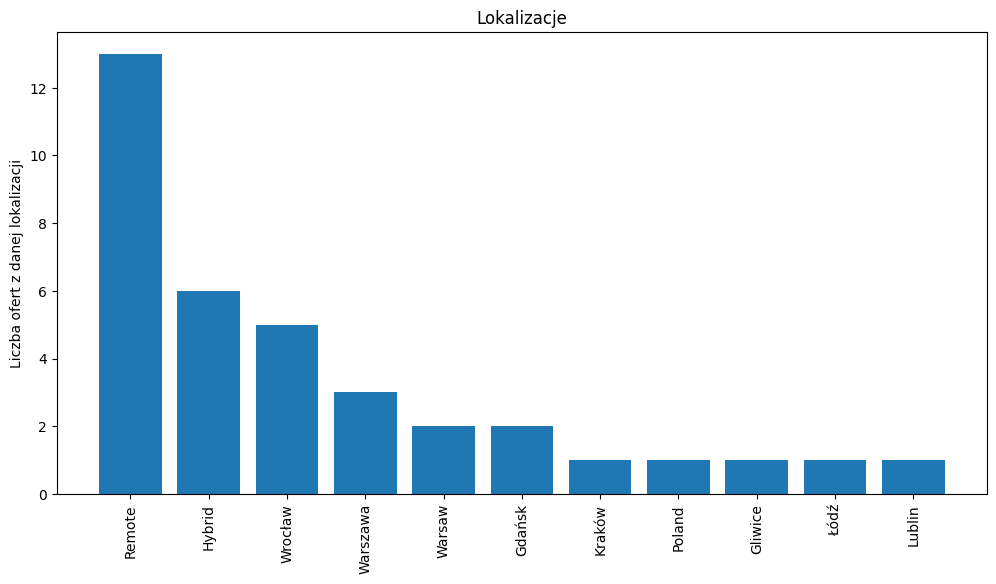

In [8]:
from collections import Counter

def location_joining(df):
    def join_locations(row):
        if row['main_location'] == '<None>' and row['other_location'] == '<None>':
            return '<none>'
        elif row['main_location'] == '<None>':
            return row['other_location']
        elif row['other_location'] == '<None>':
            return row['main_location']
        else:
            return f"{row['main_location']}, {row['other_location']}"

    df['location'] = df.apply(join_locations, axis=1)

    counter = Counter()
    
    for loc in df['location']:
        for sub_loc in loc.split(", "):
            if not any(char.isdigit() for char in sub_loc):
                counter[sub_loc] += 1

# Sortuj dane w malejącej kolejności
    sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
    
    # Tworzenie wykresu
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_data.keys(), sorted_data.values())
    plt.xticks(rotation=90)
    plt.ylabel('Liczba ofert z danej lokalizacji')
    plt.title('Lokalizacje')
    plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

location_joining(df)


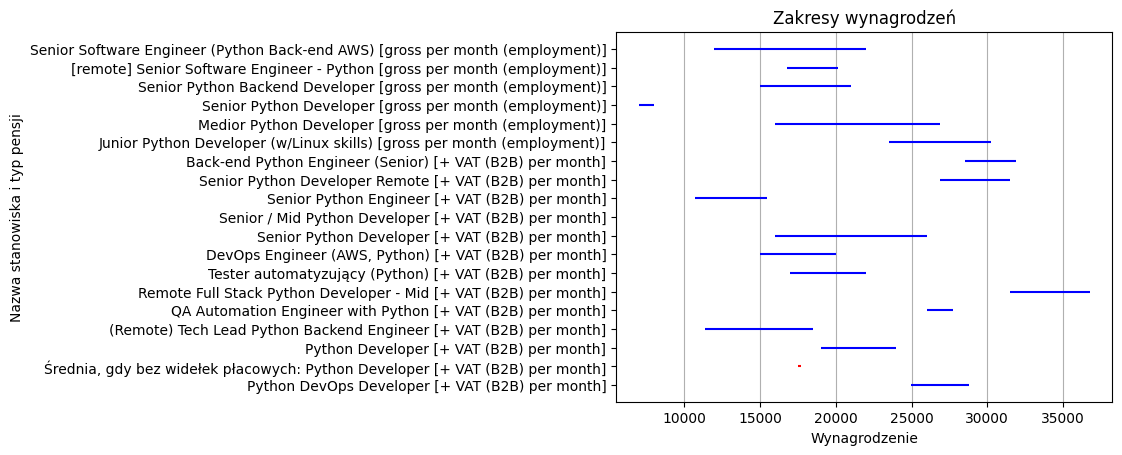

In [9]:
import re
import matplotlib.pyplot as plt

def average_salary(df):
    sum_variables_lower = {}
    sum_variables_upper = {}
    number_in_variables_type = {}

    for index, row in df.iterrows():
        # Usuwanie niecyfrowych znaków i podział wartości salary
        salary_values = row['salary'].split("–")
        salary_range = [re.sub(r'\D', '', x) for x in salary_values]

        # Tworzenie nazw zmiennych
        var_name = f"{row['offer_name']} [{row['salary_type']}]"
        lower_var_name = f"dolne_widelki_{row['offer_name']} [{row['salary_type']}]"
        upper_var_name = f"gorne_widelki_{row['offer_name']} [{row['salary_type']}]"
        no_range_var_name = f"srednia_bez_widelek_{row['offer_name']} [{row['salary_type']}]"

        if len(salary_range) > 1:
            # Sumowanie wartości do odpowiednich zmiennych (jeśli mamy widełki płacowe), oraz liczymy liczbę wystąpień danego typu wynagrodzeń
            sum_variables_lower[var_name] = sum_variables_lower.get(lower_var_name, 0) + int(salary_range[0])
            number_in_variables_type[var_name] = number_in_variables_type.get(lower_var_name, 0) + 1

            sum_variables_upper[var_name] = sum_variables_upper.get(upper_var_name, 0) + int(salary_range[1])            
        else:
            # Dodawanie wartości do zmiennej dla ofert bez widełek płacowych
            sum_variables_lower[no_range_var_name] = sum_variables_lower.get(no_range_var_name, 0) + int(salary_range[0])
            sum_variables_upper[no_range_var_name] = sum_variables_upper.get(no_range_var_name, 0) + int(salary_range[0])
            number_in_variables_type[no_range_var_name] = number_in_variables_type.get(no_range_var_name, 0) + 1

    # Wyliczanie średniej wartości parametrów, na bazie dwóch słowników
    def divide_dict_values(dict_X, dict_Y):
        """
        Dzieli wartości słownika dict_X przez wartości słownika dict_Y 
        dla każdego klucza i zwraca nowy słownik z wynikami.

        :param dict_X: Słownik z dzielnikami
        :param dict_Y: Słownik z dzielnymi
        :return: Słownik z wynikami dzielenia
        """
        if set(dict_X.keys()) != set(dict_Y.keys()):
            raise ValueError("Słowniki mają różne zbiory kluczy")

        result_dict = {}
        for key in dict_X.keys():
            if dict_Y[key] == 0:
                raise ValueError(f"Wartość dla klucza '{key}' w słowniku dict_Y jest równa zero, dzielenie niemożliwe")
            result_dict[key] = dict_X[key] / dict_Y[key]

        return result_dict

    average_values_lower = divide_dict_values(sum_variables_lower, number_in_variables_type)
    average_values_upper = divide_dict_values(sum_variables_upper, number_in_variables_type)

    # Tworzenie wykresu
    preKeys = list(average_values_lower.keys())
    values_lower = list(average_values_lower.values())
    values_upper = list(average_values_upper.values())

    keys = sorted(preKeys, key=lambda x: x[::-1], reverse=True)

    def sorting_key(key):
        # Określ pozycję klucza na wykresie w oparciu o wyrażenia
        if "[+ VAT (B2B) per month]" in key:
            position1 = 0
        elif "[gross per month (employment)]" in key:
            position1 = 1
        else:
            position1 = 2
    
        # Określ pozycję klucza w oparciu o słowa "Junior", "Senior" itp.
        if "Junior" in key:
            position2 = 0
        elif "Senior" in key:
            position2 = 2
        else:
            position2 = 1
    
        return (position1, position2)

    # Posortuj klucze słownika keys używając zdefiniowanej funkcji klucza
    sorted_keys = sorted(keys, key=sorting_key)
    
    # Posortuj klucze słownika keys używając zdefiniowanej funkcji klucza
    keys = sorted(keys, key=sorting_key)
        
    i = 0
    while i < len(keys):
        if "srednia_bez_widelek" in keys[i]:
            label = keys[i].replace("srednia_bez_widelek_", "Średnia, gdy bez widełek płacowych: ")            
            plt.hlines(label, values_lower[i] - 90, values_lower[i] + 90, colors='red', linestyles='solid')
            i += 1
        else:
            label = keys[i]
            plt.hlines(label, values_lower[i], values_upper[i], colors='blue', linestyles='solid')
            i += 1

    plt.xlabel('Wynagrodzenie')
    plt.ylabel('Nazwa stanowiska i typ pensji')
    plt.title('Zakresy wynagrodzeń')
    plt.grid(axis='x')
    plt.show()

# Test funkcji
average_salary(df)


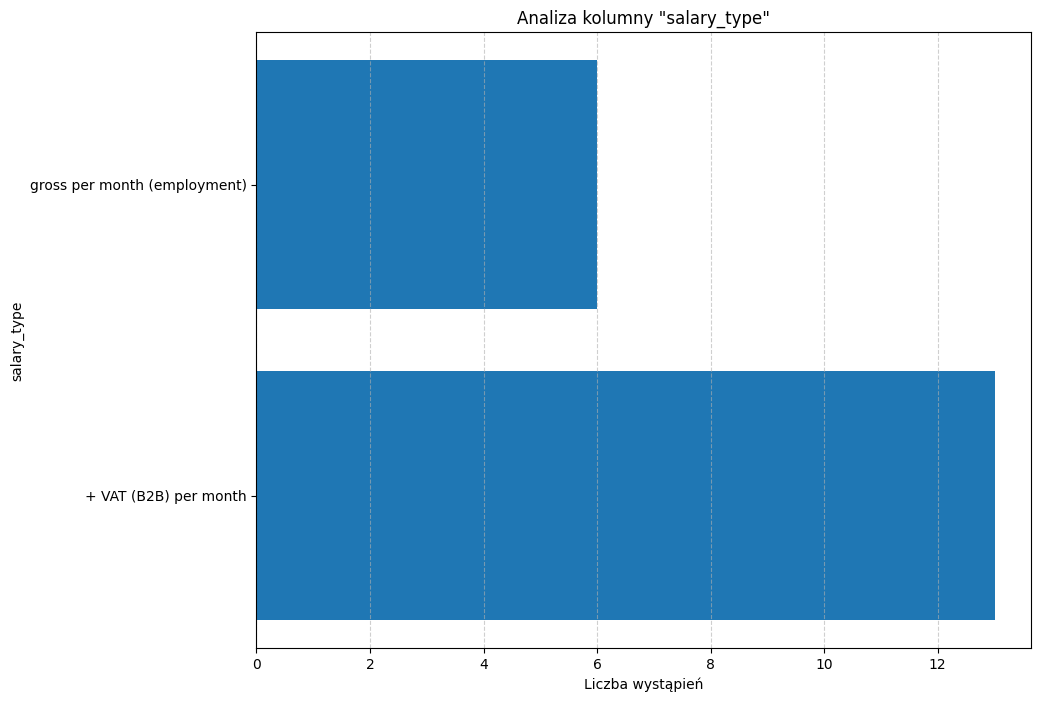

In [10]:
analyze_column(df, 'salary_type')

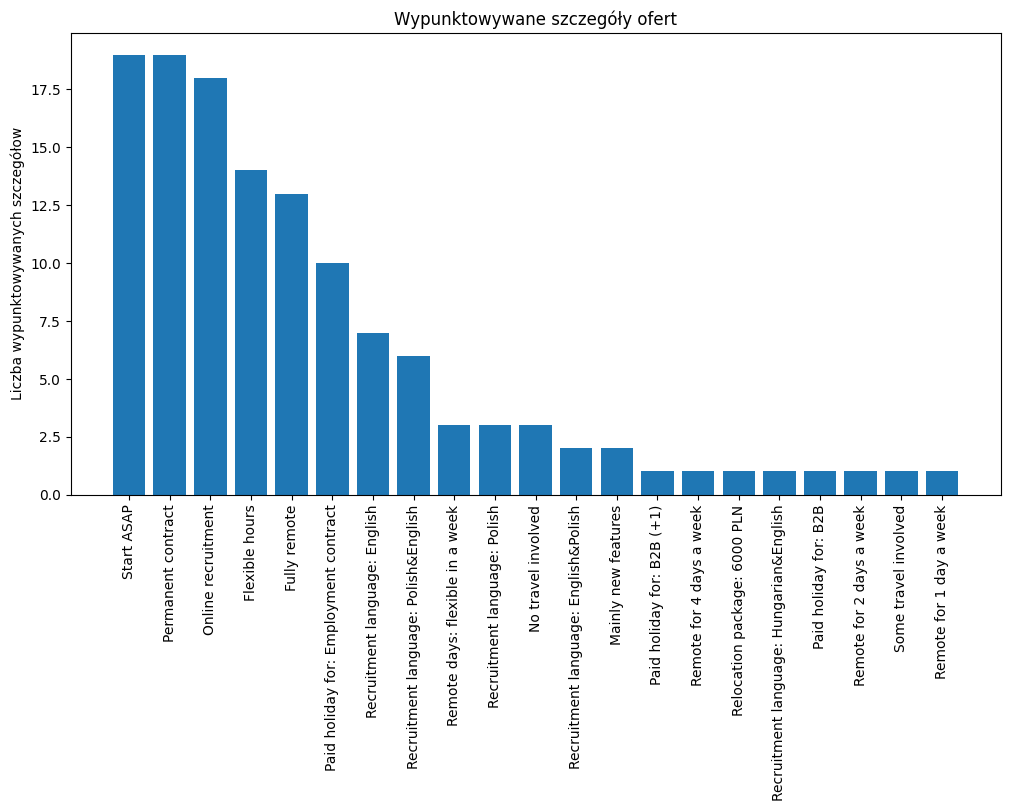

In [11]:
    def offer_details_counter(df):
        counter = Counter()
        
        for loc in df['offer_details']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
        
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba wypunktowywanych szczegółow')
        plt.title('Wypunktowywane szczegóły ofert')
        plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

offer_details_counter(df)

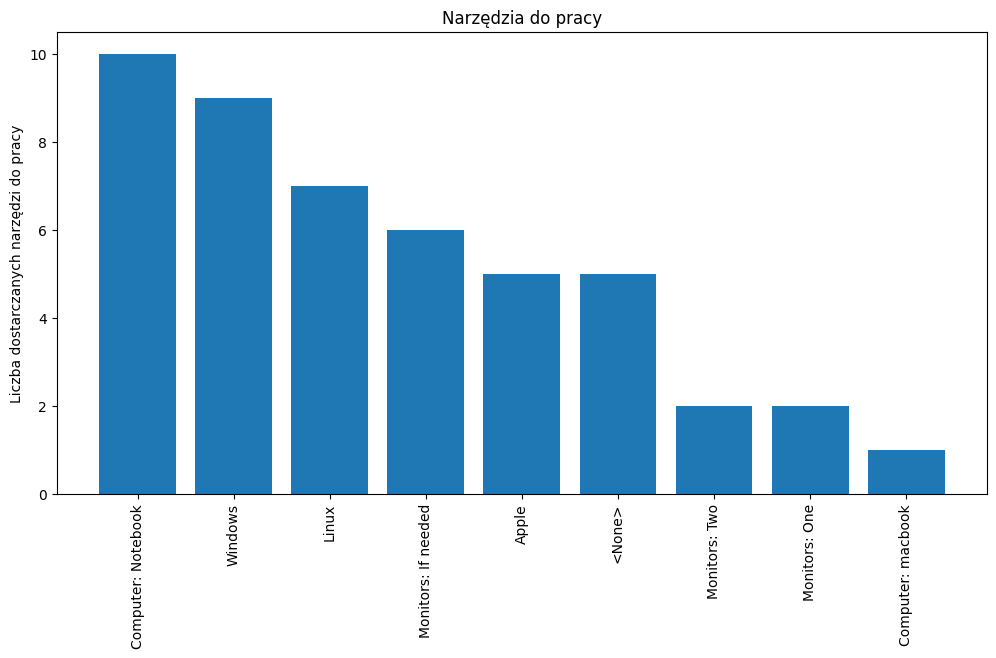

In [12]:
    def eq_supplied_counter(df):
        counter = Counter()
        
        for loc in df['equipment_supplied']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
        
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba dostarczanych narzędzi do pracy')
        plt.title('Narzędzia do pracy')
        plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

eq_supplied_counter(df)

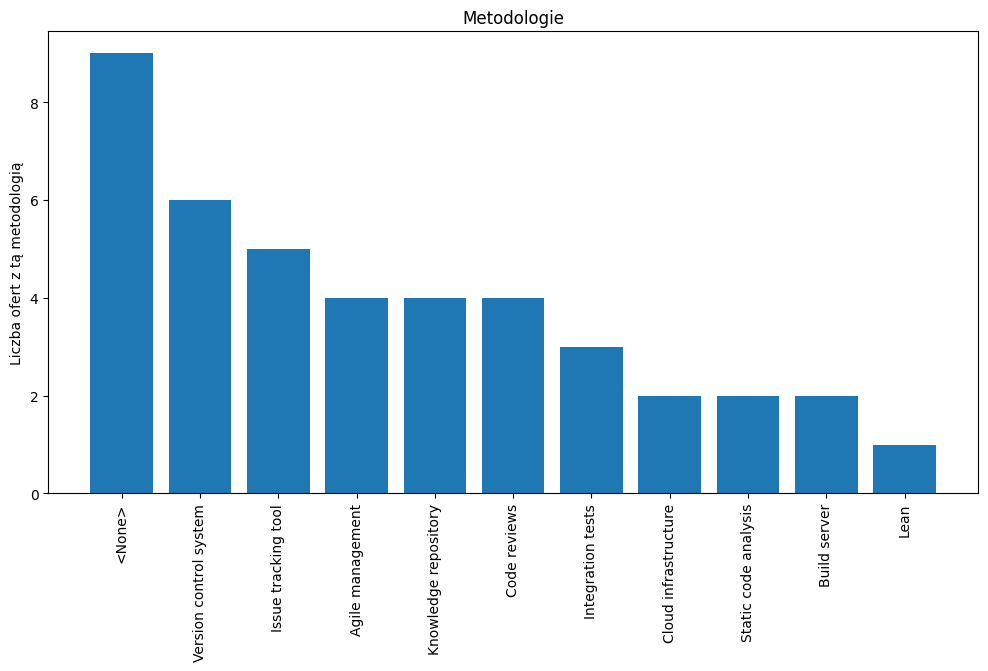

In [13]:


    def methodology_ctr(df):
        counter = Counter()
        
        for loc in df['methodology']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
        
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba ofert z tą metodologią')
        plt.title('Metodologie')
        plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

methodology_ctr(df)

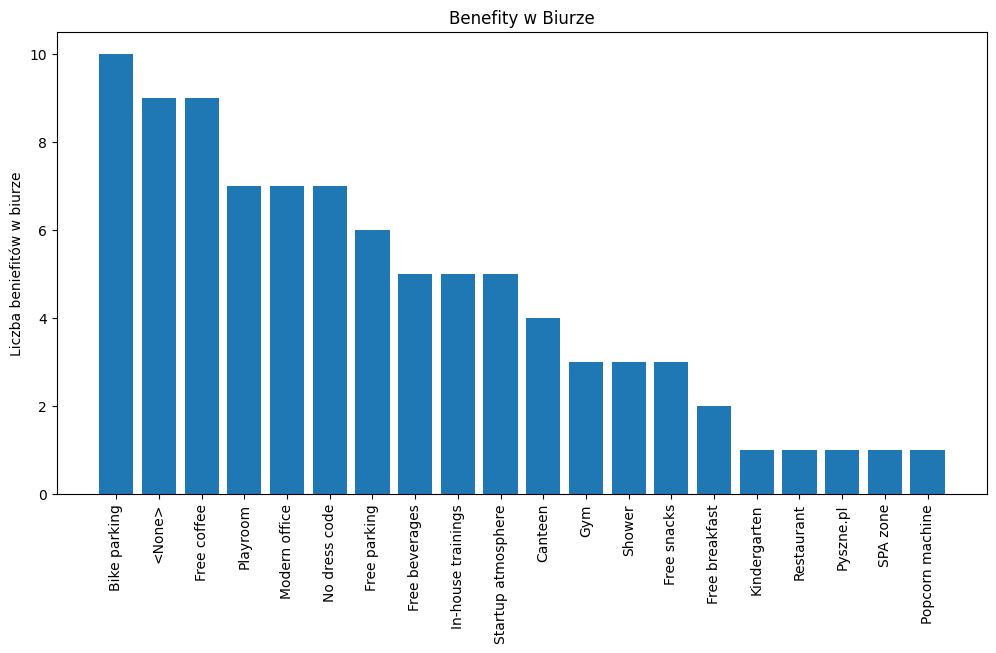

In [14]:

    def perks_ctr(df):
        counter = Counter()
        
        for loc in df['perks_in_the_office']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
        
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba beniefitów w biurze')
        plt.title('Benefity w Biurze')
        plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

perks_ctr(df)

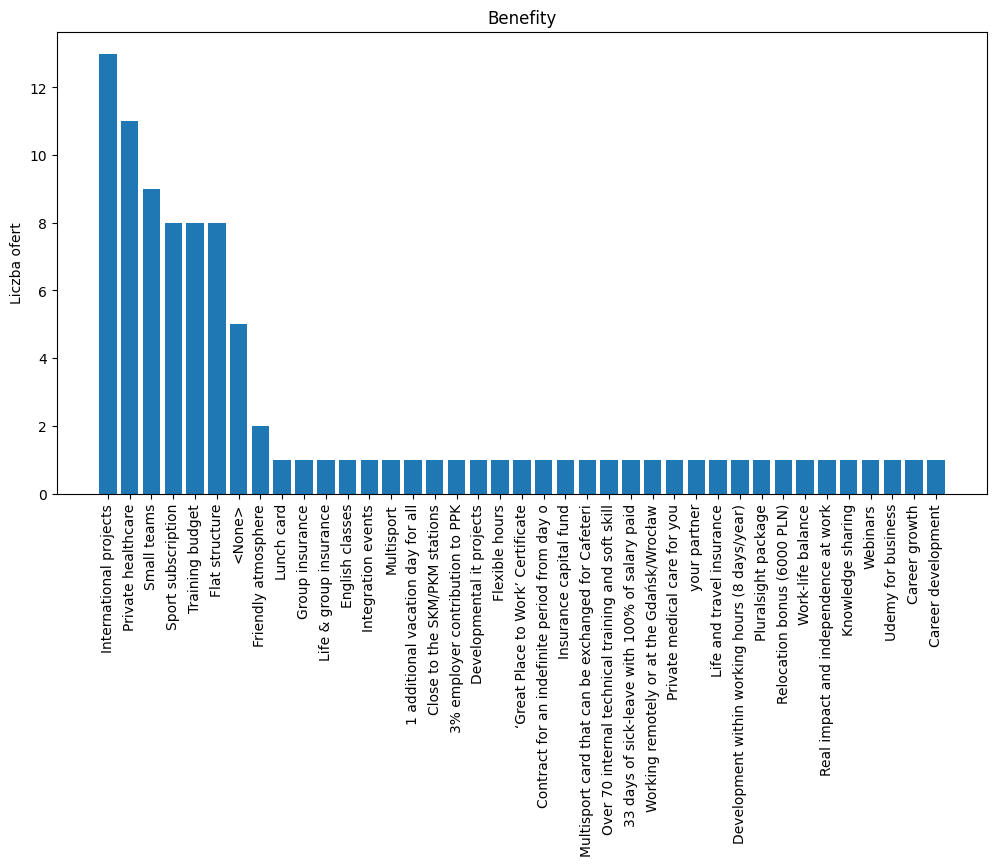

In [15]:

    def benefits_ctr(df):
        counter = Counter()
        
        for loc in df['benefits']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
        
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba ofert')
        plt.title('Benefity')
        plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

benefits_ctr(df)

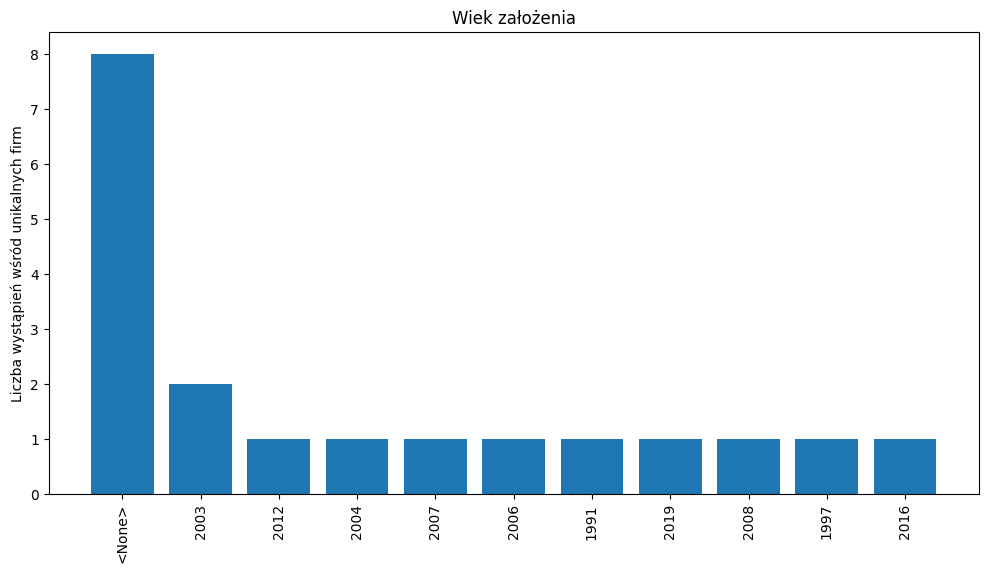

In [16]:
def unique_company_age_ctr(df):
    counter = Counter()
    once_mentioned = set()
    
    for index, row in df.iterrows():
        company = row['company']
        founded_in = row['company_info_founded_in']
        
        if company not in once_mentioned:
            counter[founded_in] += 1
            once_mentioned.add(company)
            
    # Sortuj dane w malejącej kolejności
    sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))

    plt.figure(figsize=(12, 6))
    
    # Tworzenie wykresu
    bars = plt.bar(sorted_data.keys(), sorted_data.values())
    
    # Ustawienie oznaczeń na osi X dla wszystkich wartości
    plt.xticks(rotation=90)
    
    plt.ylabel('Liczba wystąpień wśród unikalnych firm')
    plt.title('Wiek założenia')
    
    # Ustawienie formatu osi Y, aby wyświetlać tylko liczby całkowite
    ax = plt.gca()
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # for bar, label in zip(bars, sorted_data.keys()):
    #     # if np.isfinite(float(label)):  # Sprawdzenie, czy wartość jest skończona
    #     plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, label, ha='center', va='bottom', rotation=45, fontsize=8)


    
    plt.show()

# Zakładam, że masz już wcześniej zdefiniowane df
unique_company_age_ctr(df)




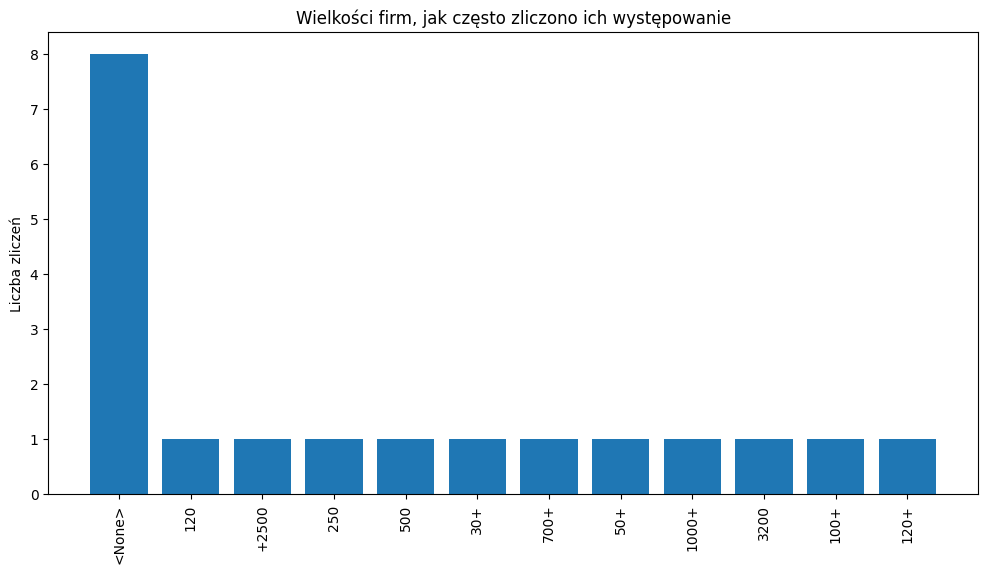

In [17]:

def string_only_size_ctr(df):
    counter = Counter()
    
    for loc in df['company_info_company_size']:
        if isinstance(loc, str):  # Tylko jeśli wartość to łańcuch znaków
            counter[loc] += 1

    # Sortuj dane według klucza
    sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
    
    # Tworzenie wykresu
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_data.keys(), sorted_data.values())
    plt.xticks(rotation=90)
    plt.ylabel('Liczba zliczeń')
    plt.title('Wielkości firm, jak często zliczono ich występowanie')
    plt.show()

# Wywołanie zmodyfikowanej funkcji
string_only_size_ctr(df)


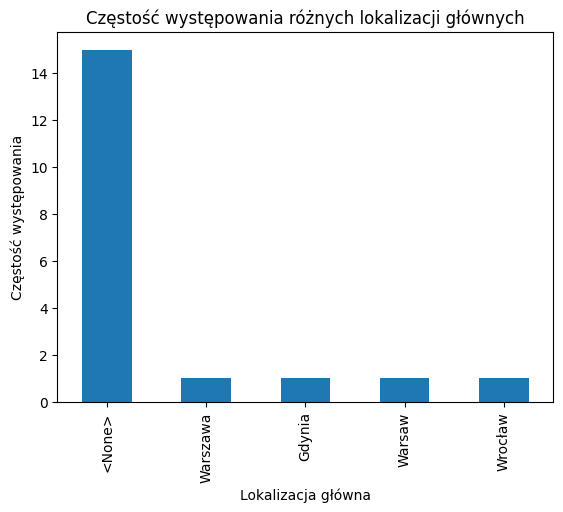

In [18]:
# Krok 1 & 2: Znajdź pierwszy wiersz dla każdej unikatowej wartości w kolumnie "company"
first_occurrences = df.drop_duplicates(subset='company')

# Krok 3 & 4: Zlicz częstość występowania różnych wartości w "company_info_main_location"
location_counts = first_occurrences['company_info_main_location'].value_counts()

# Krok 5: Stwórz wykres
location_counts.plot(kind='bar')
plt.ylabel('Częstość występowania')
plt.xlabel('Lokalizacja główna')
plt.title('Częstość występowania różnych lokalizacji głównych')
plt.show()

In [19]:
from datetime import timedelta

def analyze_when_published(row):
    if 'today' in row['when_published_relatively']:
        row['date_of_issueing_no'] = '0'
    else:
        # Wyszukuje najdłuższy ciąg cyfr w tekście
        digits = max(''.join(filter(str.isdigit, word)) for word in row['when_published_relatively'].split())
        row['date_of_issueing_no'] = digits
    return row

# Stosowanie funkcji do każdego wiersza i tworzenie kolumny 'date_of_issueing_no'
df = df.apply(analyze_when_published, axis=1)

# Utworzenie kolumny 'date_of_issueing', dodając 'date_of_issueing_no' dni do 'date_of_scrapping'
df['date_of_issueing'] = pd.to_datetime(df['date_of_scrapping']) - df['date_of_issueing_no'].astype(int).apply(lambda x: timedelta(days=x))

# Wyświetlenie wybranych kolumn
result_df = df[['id', 'date_of_scrapping', 'when_published_relatively', 'date_of_issueing', 'date_of_issueing_no']]
pd.set_option('display.max_rows', 30)
result_df

,id,date_of_scrapping,when_published_relatively,date_of_issueing,date_of_issueing_no
0,1,2023-10-03,today,2023-10-03,0
1,2,2023-10-03,today,2023-10-03,0
2,3,2023-10-03,1 day ago,2023-10-02,1
3,4,2023-10-03,This offer expires in 3 days,2023-09-30,3
4,5,2023-10-03,This offer expires in 3 days,2023-09-30,3
5,6,2023-10-03,This offer expires in 3 days,2023-09-30,3
6,7,2023-10-03,This offer expires in 5 days,2023-09-28,5
7,8,2023-10-03,3 days ago,2023-09-30,3
8,9,2023-10-03,3 days ago,2023-09-30,3
9,10,2023-10-03,3 days ago,2023-09-30,3


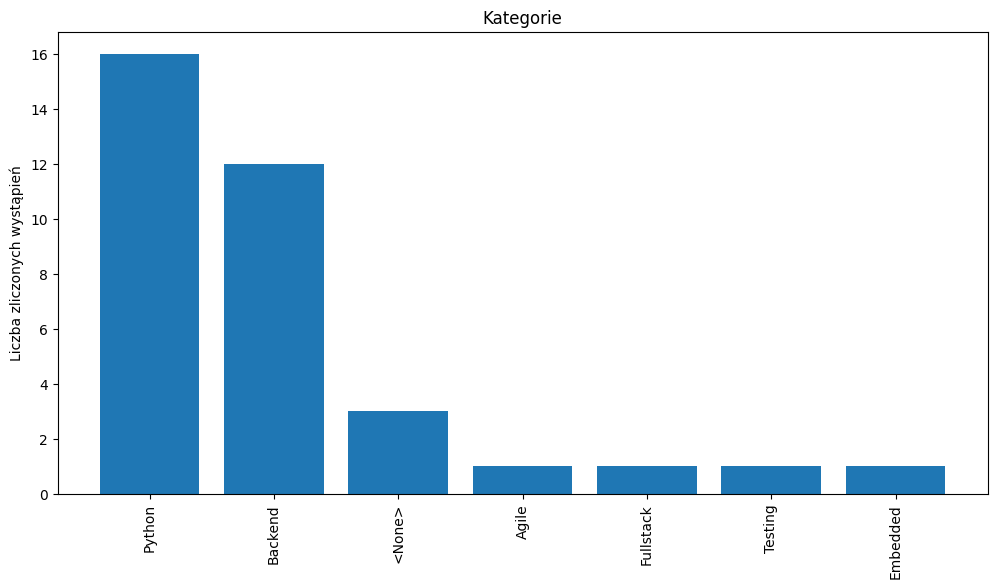

In [20]:

    def categories_ctr(df):
        counter = Counter()
        
        for loc in df['categories']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
                    
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba zliczonych wystąpień')
        plt.title('Kategorie')
        plt.show()

# Możesz teraz użyć funkcji location_joining, przekazując jej df jako argument
# df = location_joining(df)

categories_ctr(df)

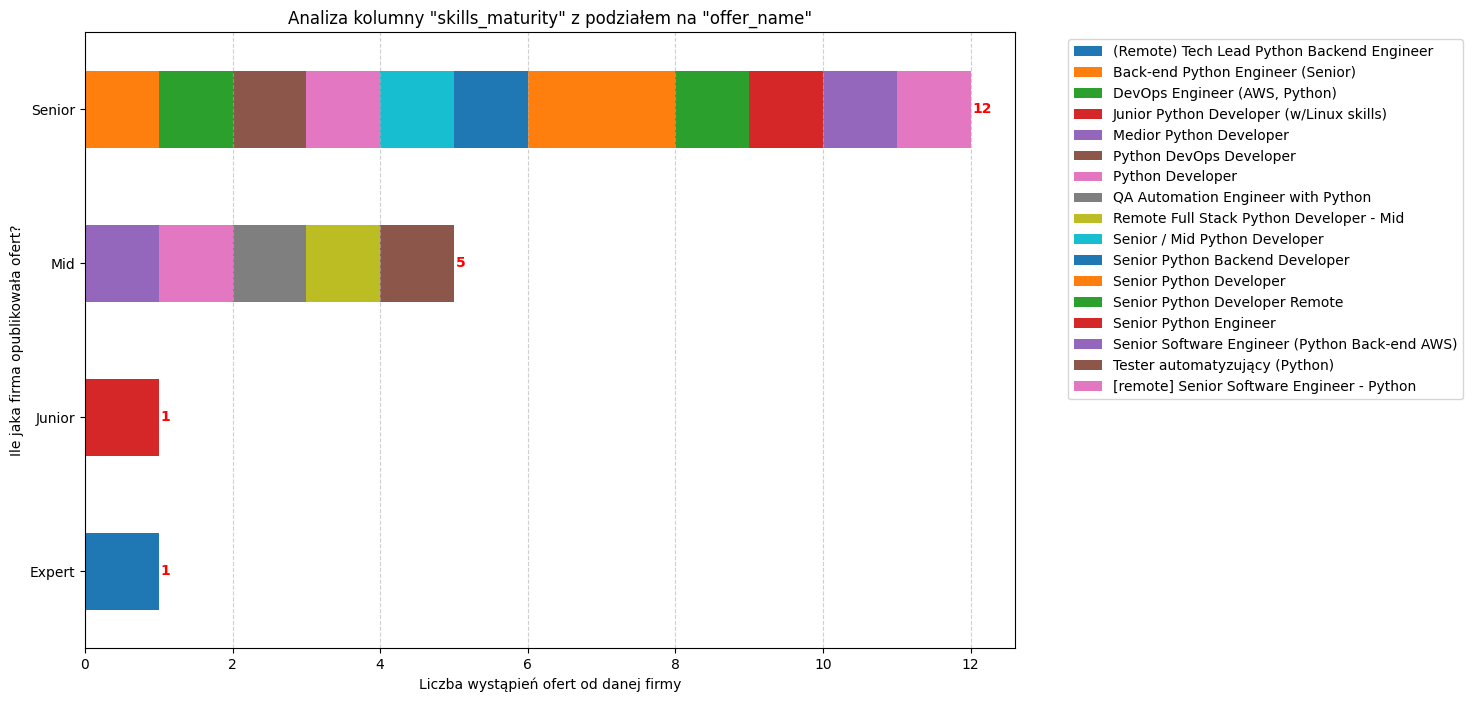

In [21]:

def analyze_skills_maturity_with_offer_names(dataframe, column_name="skills_maturity", offer_column_name="offer_name"):
    # Sprawdź, czy kolumna istnieje w ramce danych
    if column_name not in dataframe.columns:
        print(f'Kolumna "{column_name}" nie istnieje w ramce danych.')
        return

    # Sprawdź, czy kolumna z nazwami ofert istnieje w ramce danych
    if offer_column_name not in dataframe.columns:
        print(f'Kolumna "{offer_column_name}" nie istnieje w ramce danych.')
        return

    # Grupowanie danych według kolumny i kolumny z nazwami ofert, a następnie zliczanie wielkości każdej grupy
    grouped_data = dataframe.groupby([column_name, offer_column_name]).size().unstack(fill_value=0)

    # Obliczenie łącznej liczby ofert dla każdej firmy
    total_offers = grouped_data.sum(axis=1)

    # Tworzenie wizualizacji
    plt.figure(figsize=(12, 8))  # Ustawienie rozmiaru wykresu
    ax = plt.gca()  # Pobranie obecnej osi (get current axis)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Ustawienie lokalizatora głównych znaczników osi X, aby używał tylko liczb całkowitych

    # Rysowanie poziomego wykresu słupkowego z podgrupami
    grouped_data.plot(kind='barh', stacked=True, ax=ax)
    
    # Dodanie łącznej liczby ofert jako tekst na wykresie
    for i, total in enumerate(total_offers):
        plt.text(total + grouped_data.max().max() * 0.01, i, str(total), va='center', color='red', fontweight='bold', fontsize=10)
    
    plt.ylabel('Ile jaka firma opublikowała ofert?')
    plt.xlabel('Liczba wystąpień ofert od danej firmy')
    plt.title(f'Analiza kolumny "{column_name}" z podziałem na "{offer_column_name}"')
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Zmiana osi siatki na 'x'

    # Przeniesienie legendy poza obszar wykresu
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()


analyze_skills_maturity_with_offer_names(df, 'skills_maturity', 'offer_name')


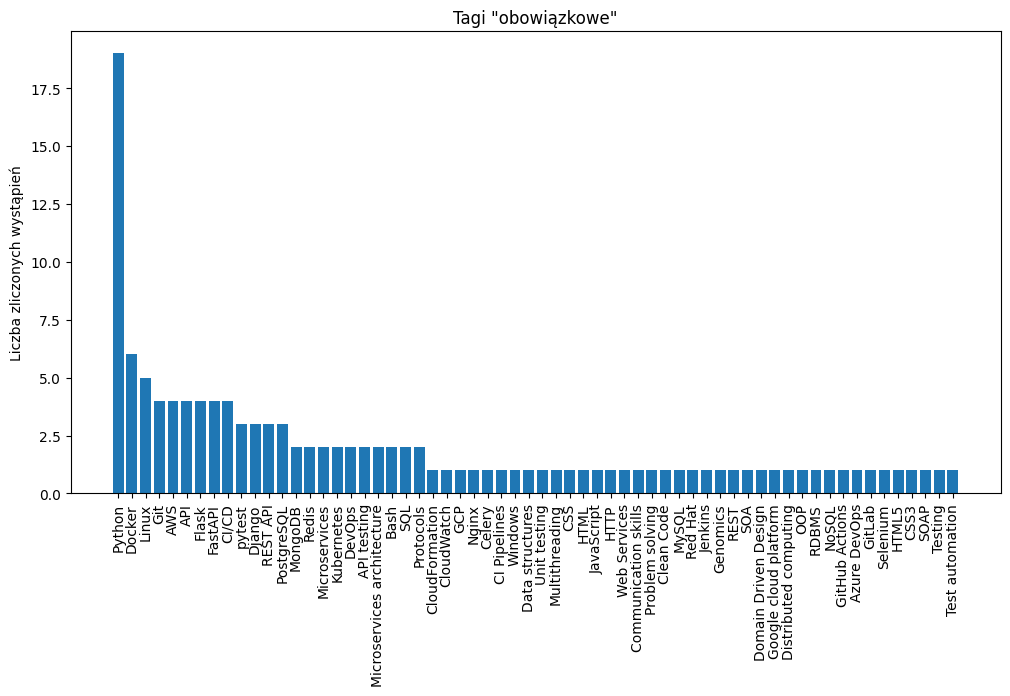

In [22]:

    def tags_mandatory_ctr(df):
        counter = Counter()
        
        for loc in df['tags_mandatory']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

         # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
                    
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba zliczonych wystąpień')
        plt.title('Tagi "obowiązkowe"')
        plt.show()



tags_mandatory_ctr(df)

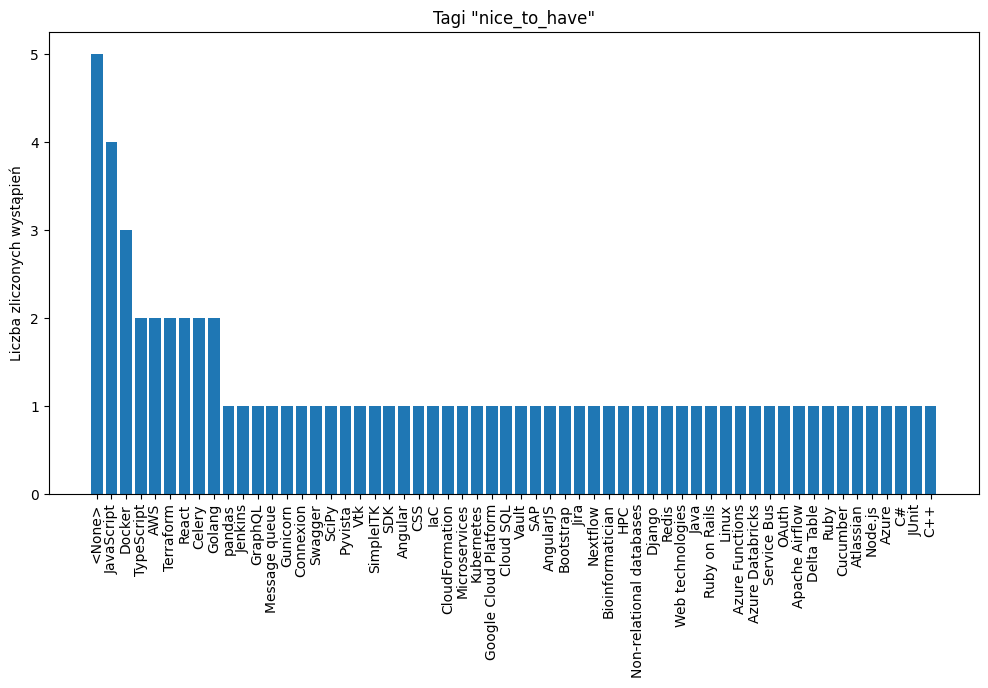

In [23]:

    def tags_nice_to_have_ctr(df):
        counter = Counter()
        
        for loc in df['tags_nice_to_have']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

         # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
                    
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba zliczonych wystąpień')
        plt.title('Tagi "nice_to_have"')
        plt.show()



tags_nice_to_have_ctr(df)